In [17]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

- Load the csv into a dataframe by using the read_csv function of pandas  
- Copy path name of file and add a r before the path name **this stands for 'raw' and will cause backlashes to be interpreted as backslashes and not special characters**
- Change \ to / in the path name
- Python infers that the first line of data will be column names. In this csv file there are no column names, so to change this do <font color=green>**header=None**</font>



In [18]:
df = pd.read_csv(r'C:Desktop/sales_data.csv', header=None)


Check to make sure data was successfully uploaded. Use <font color=blue>.head()</font> to retrieve the first 5 rows of the dataframe.

In [19]:
df.head()

,0,1
0,2017-04-02 00:00:00,1099.169125
1,2017-04-03 00:00:00,1141.813000
2,2017-04-04 00:00:00,1141.600363
3,2017-04-05 00:00:00,1133.079314
4,2017-04-06 00:00:00,1196.307937


Add column names to the dataframe by using <font color=blue>.columns</font>

In [20]:
df.columns=['Timestamp', 'Price']

Check to make sure column names were successfully added

In [21]:
df.head()

,Timestamp,Price
0,2017-04-02 00:00:00,1099.169125
1,2017-04-03 00:00:00,1141.813000
2,2017-04-04 00:00:00,1141.600363
3,2017-04-05 00:00:00,1133.079314
4,2017-04-06 00:00:00,1196.307937


The .info() method prints out dataframe information *including columns, dytpe, non-null values and memory usage.*
**Note that the Timestamp column is an object! This will need to be changed**

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Timestamp  365 non-null    object 
 1   Price      365 non-null    float64
dtypes: float64(1), object(1)
memory usage: 5.8+ KB


Use the function <font color=blue>.to_datetime()</font> to change Timestamp column into dates

In [23]:
pd.to_datetime(df['Timestamp']).head()

0   2017-04-02
1   2017-04-03
2   2017-04-04
3   2017-04-05
4   2017-04-06
Name: Timestamp, dtype: datetime64[ns]

- Change the column "Timestamp" to be the row label (index) using the .set_index method
- set inplace=False to <font color=green>inplace=True</font> to modify the existing dataframe


In [24]:
df.set_index(['Timestamp'], inplace=True)

Now its time to look at a more efficient way to do the exact same thing!

In [25]:
df = pd.read_csv(
   r'C:/Users/JoeDe/OneDrive/Desktop/btc-market-price.csv',
   header=None,
   names=['Timestamp', 'Price'],
   index_col=0,
   parse_dates=True 
)

- index_col=0 states that the first column will be the index *default is index_col=None*
- parse_dates=True will parse the index as dates *default is parse_dates=False* 

## Time to graph using matplotlib! 

Lets start with a basic graph!

<AxesSubplot: xlabel='Timestamp'>

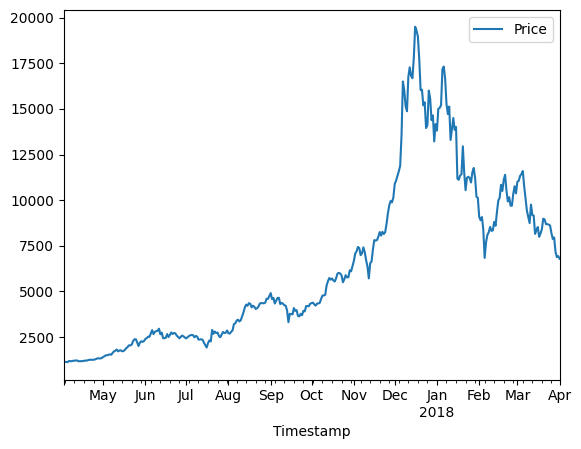

In [26]:
df.plot()

Change title, x-axis and y-axis labels to a different size and font

Text(0.5, 1.0, 'Bitcoin Prices Between 2017-2018')

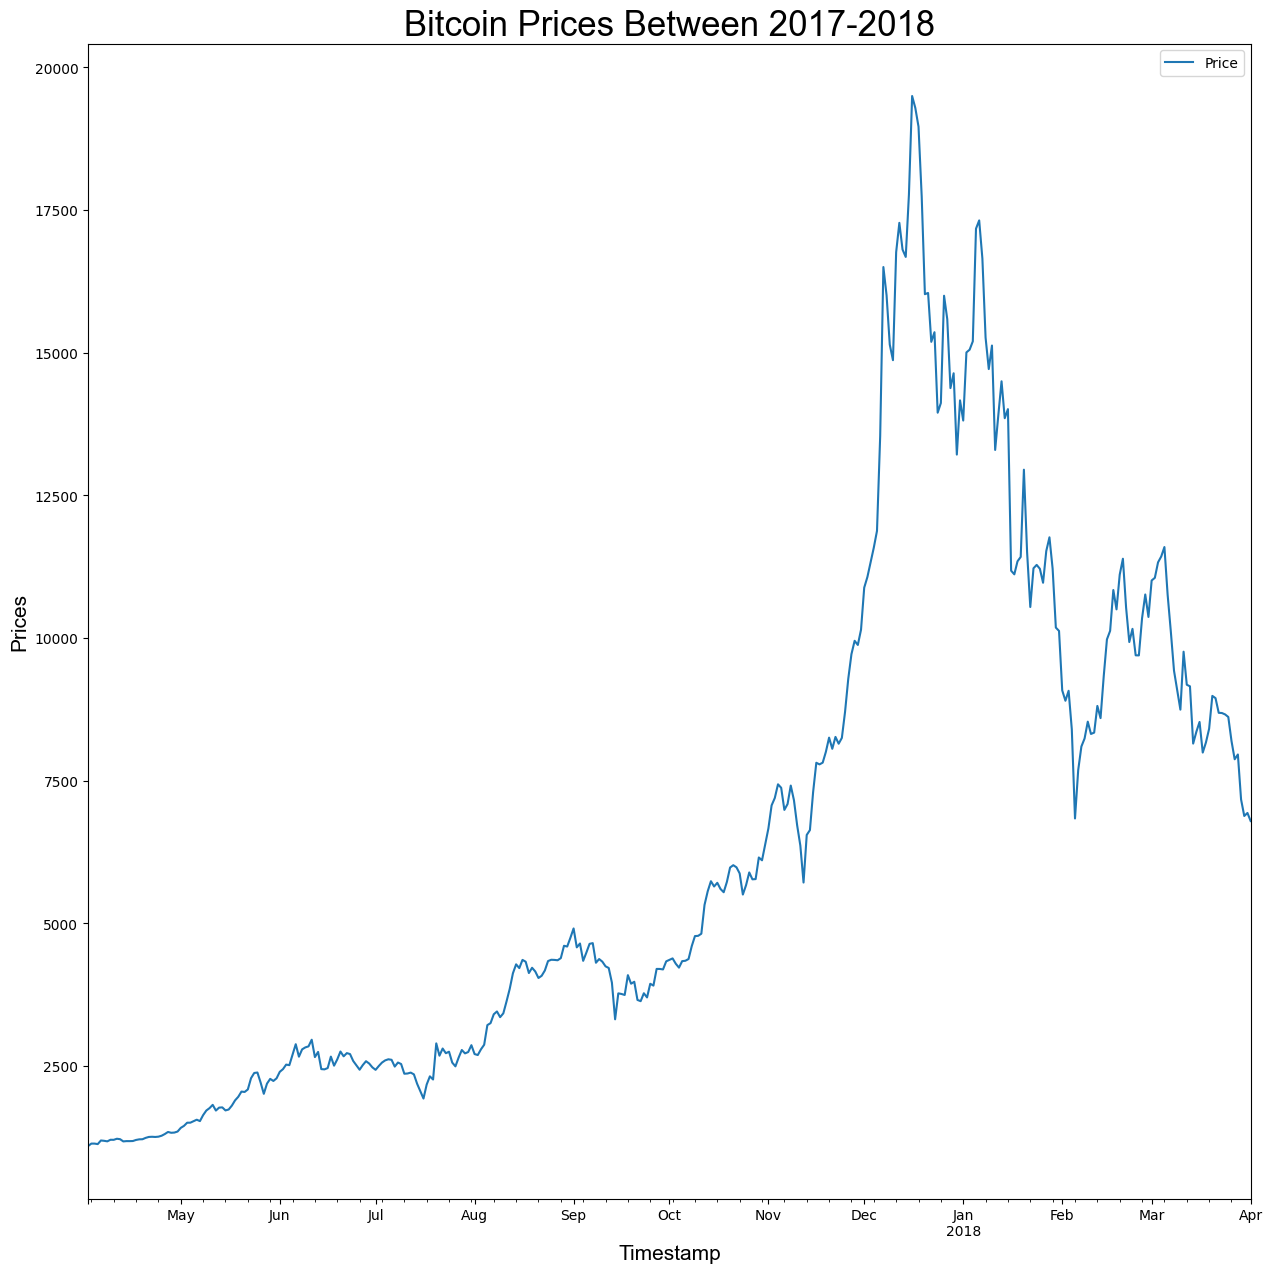

In [37]:
fig1 = df.plot(figsize=(15,15), title='Bitcoin Prices Between 2017-2018')
fig1.set_xlabel('Timestamp', fontname='Arial', fontsize=15)
fig1.set_ylabel('Prices', fontname='Arial', fontsize=15)
fig1.set_title('Bitcoin Prices Between 2017-2018', fontname='Arial', fontsize=25)